# Foundations of Deep Learning - Ecole CentraleSupelec - Fall 2018
# Solution: Assignment 1

#### Student Name: Ayush K. Rai
#### MSc in AI, Ecole Centralesupelec

In [72]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense, Input
import numpy as np
from mp1 import *
import keras
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec
import os
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, merge, concatenate
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

## 3. Simple Classification

### Generate Training Dataset

In [35]:
X_train, Y_train = generate_dataset_classification(300, 20)

print X_train.shape
print Y_train.shape

#X_train = X_train.reshape(300, 10000)
X_train = X_train.astype('float32')
#X_train /= 255

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)

Creating data for Classification:
(300, 5184)
(300,)


### Designing the Model and Optimizing it using SGD

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               2654720   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 1539      
Total params: 2,918,915
Trainable params: 2,918,915
Non-trainable params: 0
_________________________________________________________________
Train on 210 samples, validate on 90 samples
Epoch 1/50
210/210 [==============================] - 0s 2ms/step - loss: 2.2009 - acc:

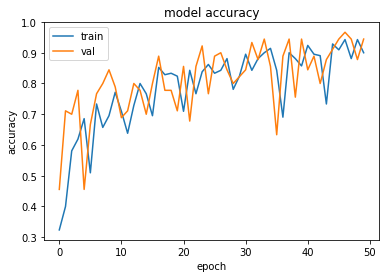

In [36]:
batch_size = 64
num_classes = 3
epochs = 50

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(5184,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                   validation_split=0.3)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Testing the Trained Model

In [37]:
#Testing the Model
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[ 0.,  1.,  0.]], dtype=float32)

### Designing the Model and Optimizing it using Adam Optimizer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               2654720   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 1539      
Total params: 2,918,915
Trainable params: 2,918,915
Non-trainable params: 0
_________________________________________________________________
Train on 210 samples, validate on 90 samples
Epoch 1/50
210/210 [==============================] - 0s 2ms/step - loss: 6.9560 - acc:

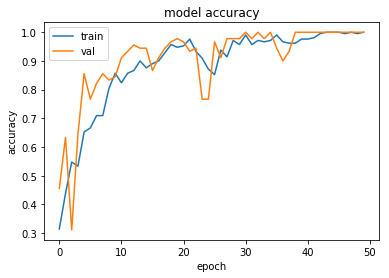

In [38]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(5184,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

adam = optimizers.Adam()
batch_size = 64
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=adam,metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                   validation_split=0.3)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Testing the Model

In [39]:
#Testing the Model
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[ 0.,  1.,  0.]], dtype=float32)

## 4. Visualization of the Solution

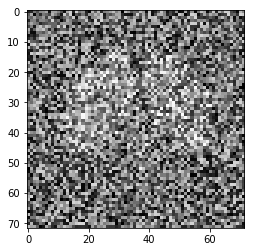

In [40]:
weights = model.get_weights()

plt.imshow(np.array(weights[0])[:,0:1].reshape(72,72), cmap = cm.gray)
plt.show()

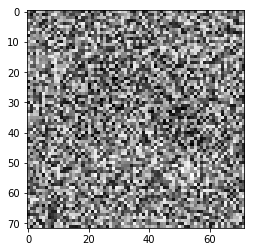

In [41]:
plt.imshow(np.array(weights[0])[:,1:2].reshape(72,72), cmap = cm.gray)
plt.show()

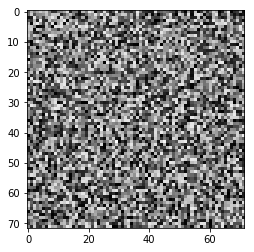

In [42]:
plt.imshow(np.array(weights[0])[:,2:3].reshape(72,72), cmap = cm.gray)
plt.show()

## 5. A More Difficult Classification Problem

### Generating the Train Dataset

In [43]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
Y_train = keras.utils.to_categorical(Y_train, num_classes)

Creating data for Classification:


### Generating the Test Dataset

In [44]:
[X_test, Y_test] = generate_test_set_classification()

print X_test.shape, Y_test.shape

Creating data for Classification:
(300, 5184) (300, 3)


##### Here we are using the previous model (Only Fully Connected Layers and Dropout) to classify images (with noise)

Train on 210 samples, validate on 90 samples
Epoch 1/50
210/210 [==============================] - 0s 2ms/step - loss: 7.3110 - acc: 0.3286 - val_loss: 11.1036 - val_acc: 0.3111
Epoch 2/50
210/210 [==============================] - 0s 529us/step - loss: 10.6686 - acc: 0.3381 - val_loss: 11.1036 - val_acc: 0.3111
Epoch 3/50
210/210 [==============================] - 0s 514us/step - loss: 10.6686 - acc: 0.3381 - val_loss: 11.1036 - val_acc: 0.3111
Epoch 4/50
210/210 [==============================] - 0s 518us/step - loss: 10.6686 - acc: 0.3381 - val_loss: 11.1036 - val_acc: 0.3111
Epoch 5/50
210/210 [==============================] - 0s 531us/step - loss: 10.6686 - acc: 0.3381 - val_loss: 11.1036 - val_acc: 0.3111
Epoch 6/50
210/210 [==============================] - 0s 514us/step - loss: 10.6686 - acc: 0.3381 - val_loss: 11.1036 - val_acc: 0.3111
Epoch 7/50
210/210 [==============================] - 0s 511us/step - loss: 10.6686 - acc: 0.3381 - val_loss: 11.1036 - val_acc: 0.3111
Epoch 

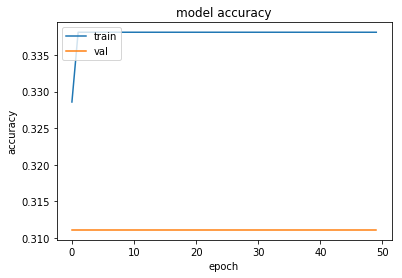

In [45]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(5184,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


batch_size = 64
num_classes = 3
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                   validation_split=0.3)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [46]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

300/300 [==============================] - 0s 92us/step
('Test loss:', 10.637942924499512)
('Test accuracy:', 0.34000000009934106)


#### We make an observation that when the dataset has noise then just fully connected layers fails to recognize the images and the result we get is equivalent to random classification. 1/3 = 0.33 (approximate as the number of classes are 3)

### Using Convolutional Neural Network

#### Note: Here we are generating training data again because we want to train CNNs on more data to reduce the variance of the model.

Creating data for Classification:
('X_train shape:', (5000, 72, 72, 1))
(5000, 'train samples')
('X_test shape:', (300, 72, 72, 1))
(300, 'test samples')
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 70, 70, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 66, 66, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 33, 33, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 31, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 15, 15, 64)       

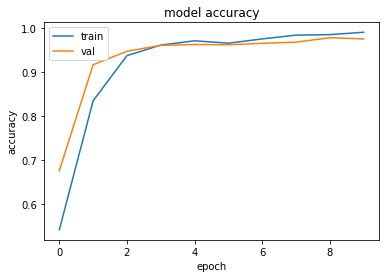

In [48]:
#Generate Dataset
[X_train, Y_train] = generate_dataset_classification(5000, 20, True)
Y_train = keras.utils.to_categorical(Y_train, num_classes)

img_rows, img_cols = 72, 72
epochs = 10
batch_size = 64

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
#X_train /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
#X_test /= 255
print('X_test shape:', X_test.shape)
print(X_test.shape[0], 'test samples')

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
         validation_split=0.3)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [49]:
score = model.evaluate(X_test, Y_test, verbose=1,batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

300/300 [==============================] - 1s 4ms/step
('Test loss:', 0.074374269843101498)
('Test accuracy:', 0.9766666674613953)


## 6. A Regression Problem

### Generate Train Dataset and Visualize it

In [50]:
#Generate Dataset
[X_train, Y_train] = generate_dataset_regression(5000, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

In [51]:
print X_train.shape
print Y_train.shape

(5000, 5184)
(5000, 6)


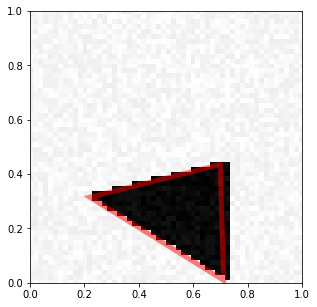

In [52]:
visualize_prediction(X_train[0], Y_train[0])

In [53]:
print Y_train[0]

[ 0.71212989  0.00944359  0.69961124  0.43494641  0.2201041   0.31469432]


### Generate the Test Dataset and Visualize it

In [54]:
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


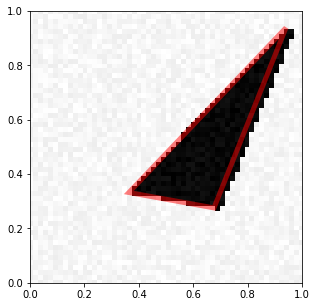

In [55]:
visualize_prediction(X_test[0], Y_test[0])

In [56]:
print Y_test[0]

[ 0.94133439  0.93818117  0.67661723  0.27556678  0.36340393  0.33217252]


### Function for Sorting the Vertex Order Based on X Coordinate : Input to Regression Network

In [58]:
def order_vertex(a):
    list_a = list(a)
    even_a = a[0:][::2]
    odd_a = a[1:][::2]
    b = zip(even_a,odd_a)
    sort_b = sorted(b, key=lambda x: x[0])
    ordered_a = [x for t in sort_b for x in t]
    return np.array(ordered_a)

In [59]:
# Order Y_train
Y_train_ordered =np.apply_along_axis(order_vertex, 1, Y_train)

#Order Y_test
Y_test_ordered = np.apply_along_axis(order_vertex, 1, Y_test)

### Checking if Vertices are Ordered

In [60]:
print 'Y train'
print Y_train[0]

print 'Ordered Y train'
print Y_train_ordered[0]

Y train
[ 0.71212989  0.00944359  0.69961124  0.43494641  0.2201041   0.31469432]
Ordered Y train
[ 0.2201041   0.31469432  0.69961124  0.43494641  0.71212989  0.00944359]


In [61]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
print('X_test shape:', X_test.shape)
print(X_test.shape[0], 'test samples')

('X_train shape:', (5000, 72, 72, 1))
(5000, 'train samples')
('X_test shape:', (300, 72, 72, 1))
(300, 'test samples')


In [72]:
img_rows, img_cols = 72, 72
epochs = 15
batch_size = 64

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='linear'))
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history = model.fit(X_train, Y_train_ordered, epochs=epochs, batch_size=batch_size,  verbose=1, validation_split=0.3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 70, 70, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 66, 66, 64)        51264     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 33, 33, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 31, 31, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 14400)             0         
__________

### Evaluating the Performance on Test Dataset

In [73]:
pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test_ordered)
print('Test Mean Sqaured loss:', score[0])

300/300 [==============================] - 1s 4ms/step
('Test Mean Sqaured loss:', 0.01117090533177058)


### Visualize the Test Image

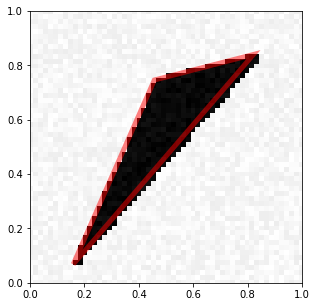

In [80]:
visualize_prediction(X_test[100], Y_test[100])

### Visualize the Prediction for Test Image

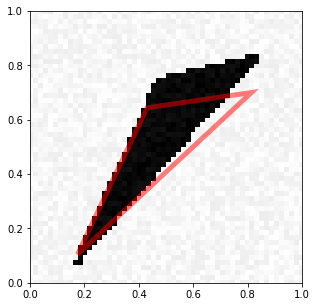

In [81]:
visualize_prediction(X_test[100], pred[100])

### Few More Visualizations of Predicted Coordinates and the GroundTruth Coordinates on Test Dataset

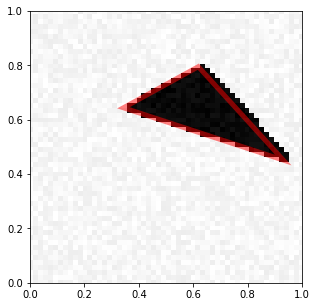

In [82]:
visualize_prediction(X_test[50], Y_test[50])

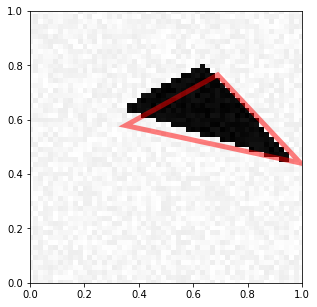

In [83]:
#Prediction
visualize_prediction(X_test[50], pred[50])

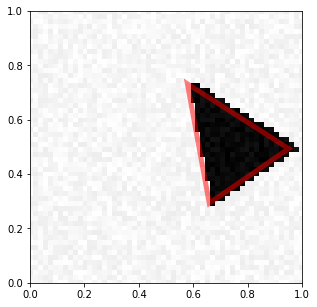

In [99]:
visualize_prediction(X_test[95], Y_test[95])

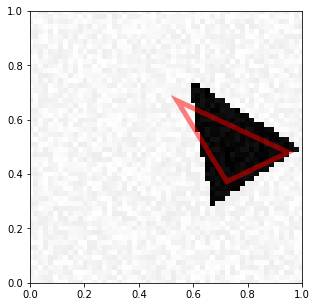

In [100]:
# Prediction
visualize_prediction(X_test[95], pred[95])

## 7. Image Denoising

### Noisy Data Generation

#### Here we are modifying the images to induce the noises

In [73]:
def generate_a_drawing_noise(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata_noise_free = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata_noise = imdata_noise_free + noise * np.random.random(imdata_noise_free.size)
    plt.close(fig)
    return imdata_noise_free, imdata_noise

#-------------------------------------------------------------------------------

def generate_a_rectangle_noise(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing_noise(figsize, U, V, noise)

#----------------------------------------------------------------------------------

def generate_a_disk_noise(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing_noise(figsize, U, V, noise)

#-------------------------------------------------------------------------------------

def generate_a_triangle_noise(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
        
    return generate_a_drawing_noise(figsize, U, V, noise)
    

#------------------------------------------------------------------------------------

def generate_dataset_classification_noise(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i], Y[i] = generate_a_rectangle_noise(noise, free_location)
        elif category == 1: 
            X[i],Y[i] = generate_a_disk_noise(noise, free_location)
        else:
            X[i], Y[i] = generate_a_triangle_noise(noise, free_location)
        
    X = (X + noise) / (255 + 2 * noise)
    Y = Y/255.0
    return [X, Y]

#------------------------------------------------------------------------------------------

def generate_test_set_classification_noise():
    np.random.seed(42)
    [Y_test,X_test] = generate_dataset_classification_noise(10, 20, True)
    return [Y_test, X_test]

### Generate Dataset for Hourglass Network

In [110]:
#Generate the Train Dataset 
# Here Y_train is the noise free image
# And X_train is the noisy image
[Y_train, X_train] = generate_dataset_classification_noise(5000, 20, True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

### Visualize Noise Free Image

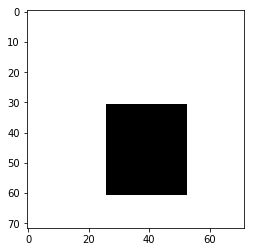

In [111]:
plt.imshow(Y_train[0].reshape(72,72), cmap='gray')

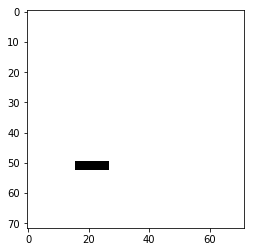

In [112]:
plt.imshow(Y_train[200].reshape(72,72), cmap='gray')

### Visualize Corresponding Noisy Images

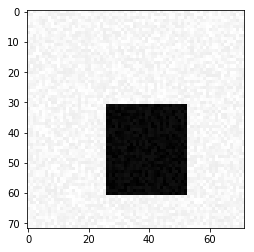

In [113]:
plt.imshow(X_train[0].reshape(72,72), cmap='gray')

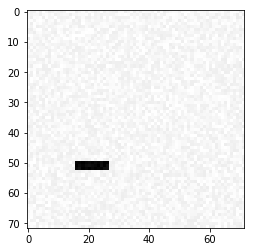

In [114]:
plt.imshow(X_train[200].reshape(72,72), cmap='gray')

### Designing the Hour Glass Network for Denoising

In [115]:
img_rows, img_cols = 72, 72
epochs = 30
batch_size = 32

print X_train.shape
print Y_train.shape


#--------------------------------------------------------------------------------
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
#input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')

Y_train = Y_train.reshape(Y_train.shape[0],img_rows,img_cols,1)

print('Y_train shape:', Y_train.shape)
print(Y_train.shape[0],'train samples')

#-------------------------------------------------------------------------------------

input_img = Input(shape=(img_rows, img_cols, 1))

#Encoder Network
encoded1 = Conv2D(72, (5, 5), activation='relu', padding='same')(input_img)
encoded2 = MaxPooling2D((2, 2), padding='same')(encoded1)
encoded3 = Conv2D(36, (3, 3), activation='relu', padding='same')(encoded2)
encoded4 = MaxPooling2D((2, 2), padding='same')(encoded3)
encoded5 = Conv2D(18, (3, 3), activation='relu', padding='same')(encoded4)
encoded6 = MaxPooling2D((2, 2), padding='same')(encoded5)

#Decoder Network
decoded1 = Conv2D(18, (3, 3), activation='relu', padding='same')(encoded6)
decoded2 = UpSampling2D((2, 2))(decoded1)
decoded3 = Conv2D(36, (3, 3), activation='relu', padding='same')(decoded2)

#decoded4 = merge([encoded3,decoded3],mode='concat',concat_axis=3)
decoded4 = concatenate([encoded4,decoded3])

decoded5 = UpSampling2D((2, 2))(decoded3)
decoded6 = Conv2D(72, (3, 3),padding='same', activation='relu')(decoded5)
decoded7 = UpSampling2D((2, 2))(decoded6)

decoded8 = Conv2D(1, (5, 5), padding='same',activation='sigmoid')(decoded7)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded8)

autoencoder.summary()

(5000, 5184)
(5000, 5184)
('X_train shape:', (5000, 72, 72, 1))
(5000, 'train samples')
('Y_train shape:', (5000, 72, 72, 1))
(5000, 'train samples')
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 72, 72, 1)         0         
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 72, 72, 72)        1872      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 36, 36, 72)        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 36, 36, 36)        23364     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 18, 18, 36)        0         
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 18, 18, 18)        585

In [116]:
#  this model maps an input to its encoded representation
encoder = Model(input_img, encoded6)
autoencoder.compile(optimizer='adam', loss='mse')
estop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
train_history = autoencoder.fit(X_train , Y_train , epochs=epochs, batch_size= batch_size, validation_split = 0.2, callbacks=[estop])

Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 6s 1ms/step - loss: 0.0322 - val_loss: 0.0066
Epoch 2/30
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0049 - val_loss: 0.0041
Epoch 3/30
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 4/30
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 5/30
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 6/30
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 7/30
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 8/30
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 9/30
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 10/30
4000/4000 [===========

### Testing the Hour Glass Denoising Network

In [117]:
# Generate test data
[Y_test, X_test] = generate_test_set_classification_noise()

print X_test.shape
print Y_test.shape

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
#X_test /= 255
print('X_test shape:', X_test.shape)
print(X_test.shape[0], 'test samples')

Y_test = Y_test.reshape(Y_test.shape[0],img_rows,img_cols,1)
#Y_test /=255
print('Y_test shape:', Y_test.shape)
print(X_test.shape[0],'test samples')


Creating data:
0
(10, 5184)
(10, 5184)
('X_test shape:', (10, 72, 72, 1))
(10, 'test samples')
('Y_test shape:', (10, 72, 72, 1))
(10, 'test samples')


### Generating the Denoised Image from Test Dataset (Hourglass Network Output)

In [118]:
pred = autoencoder.predict(X_test)

### Original Noisy Image

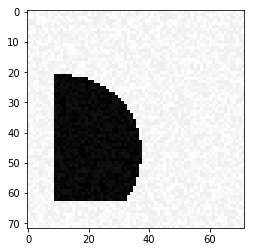

In [119]:
plt.imshow(X_test[5].reshape(img_rows, img_cols), cmap='gray')

### Output of Hourglass Network : Denoised Image

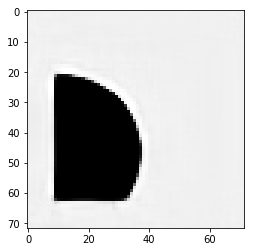

In [120]:
plt.imshow(pred[5].reshape(img_rows, img_cols), cmap='gray')

### Original Image without Noise

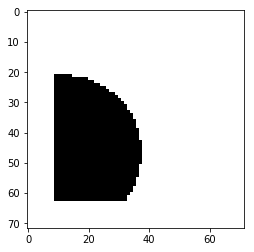

In [121]:
plt.imshow(Y_test[5].reshape(img_rows, img_cols), cmap='gray')

### Few More Examples I

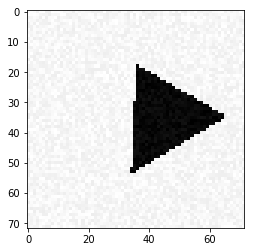

In [122]:
#Image in Test Dataset
plt.imshow(X_test[1].reshape(img_rows, img_cols), cmap='gray')

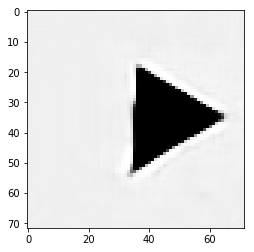

In [124]:
#Output of the Network
plt.imshow(pred[1].reshape(img_rows, img_cols), cmap='gray')

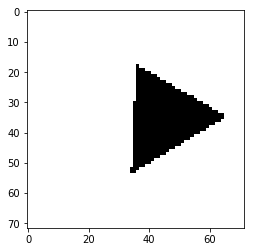

In [125]:
#Groundtruth
plt.imshow(Y_test[1].reshape(img_rows, img_cols), cmap='gray')

### Few More Examples II

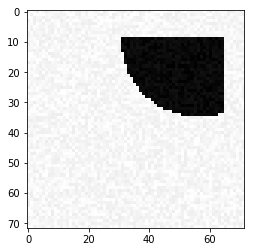

In [126]:
#Image in Test Dataset
plt.imshow(X_test[4].reshape(img_rows, img_cols), cmap='gray')

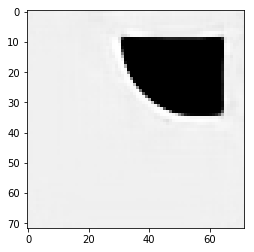

In [127]:
#Output of the Network
plt.imshow(pred[4].reshape(img_rows, img_cols), cmap='gray')

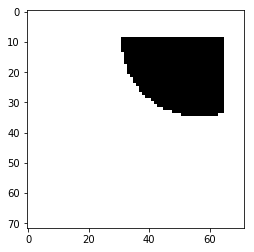

In [128]:
#Groundtruth
plt.imshow(Y_test[4].reshape(img_rows, img_cols), cmap='gray')